In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# install SentenceTransformer
!pip install -U sentence-transformers
!pip install lime

In [5]:
# import some librarys
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [6]:
# you have to change the path
dataSet1 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/article_and_tweets_with_cleaning.csv', sep = ",")
dataSet2 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/article_and_tweets_without_cleaning.csv', sep = ",")
dataSet3 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/tweets_with_cleaning.csv', sep = ",")
dataSet4 = pd.read_csv('/content/drive/MyDrive/Abschlussarbeit/Datasets/Dataset/tweets_without_cleaning.csv', sep = ",")
dataSet_array = [dataSet1, dataSet2, dataSet3, dataSet4]

In [ ]:
# creat the SentenceTransformer model for encode the texts
model = SentenceTransformer('all-MiniLM-L6-v2')

In [37]:
# polt method
def plot_graphs(score_list, k_range, maxScore, max_k):
  fig, (ax) = plt.subplots(1)
  plt.xlabel("k")
  plt.ylabel("score")
  plt.title('find the best k')
  arrayX =[0, max_k]
  arrayY =[0.0, maxScore]
  arrayX_cons = [maxScore, maxScore]
  arrayY_cons = [max_k, max_k]
  
  line, = ax.plot(k_range, score_list)

  ax.annotate('best k', xy=(max_k, maxScore), xytext=(max_k+2, maxScore+1),
              arrowprops=dict(facecolor='black', shrink=0.1),
             )
  ax.plot(arrayY_cons, arrayY)
  ax.plot(arrayX, arrayX_cons)
  ax.get_lines()[1].set_color("black")
  ax.get_lines()[2].set_color("black")
  ax.set_ylim(min(score_list)-2,max(score_list)+2)
  plt.show()

In [39]:
# this method will find the best k for each split
def find_the_best_k(training_padded, training_labels, testing_padded, testing_labels):
  maxScore = 0
  result = 0
  k_range = list(range(1, 51))
  score_list = []
  for k in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(training_padded, training_labels)
    score = knn.score(testing_padded, testing_labels)
    score = score * 100
    score_list.append(score)
    if maxScore < score:
      maxScore = score
      result = k
  plot_graphs(score_list, k_range, maxScore, result)
  return result

------------------------------------------------------------
!!!!!  sub-experiment with KNN model number 4  !!!!!
!!!!!  dataset used is : tweets without cleaning  !!!!!
------------------------------------------------------------
             !!!!!  split number : 1  !!!!!
     In training: Counter({False: 8960, True: 8906})
     In testing: Counter({True: 1020, False: 966})


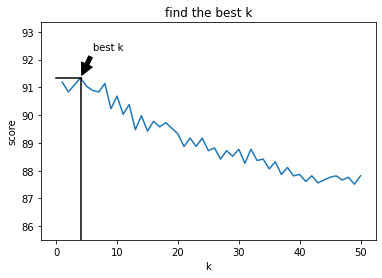

           The best k found: 4,  score = 0.9133937562940584


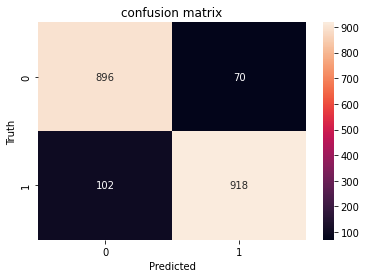

              precision    recall  f1-score   support

       False       0.90      0.93      0.91       966
        True       0.93      0.90      0.91      1020

    accuracy                           0.91      1986
   macro avg       0.91      0.91      0.91      1986
weighted avg       0.91      0.91      0.91      1986

             !!!!!  split number : 2  !!!!!
     In training: Counter({False: 8951, True: 8915})
     In testing: Counter({True: 1011, False: 975})


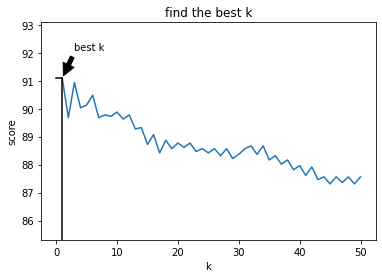

           The best k found: 1,  score = 0.9108761329305136


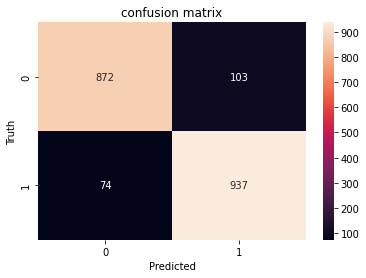

              precision    recall  f1-score   support

       False       0.92      0.89      0.91       975
        True       0.90      0.93      0.91      1011

    accuracy                           0.91      1986
   macro avg       0.91      0.91      0.91      1986
weighted avg       0.91      0.91      0.91      1986

             !!!!!  split number : 3  !!!!!
     In training: Counter({False: 8953, True: 8914})
     In testing: Counter({True: 1012, False: 973})


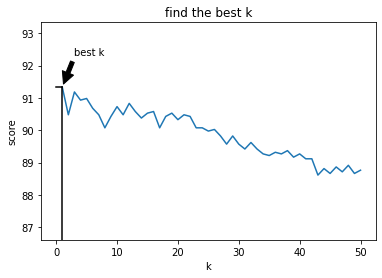

           The best k found: 1,  score = 0.9133501259445844


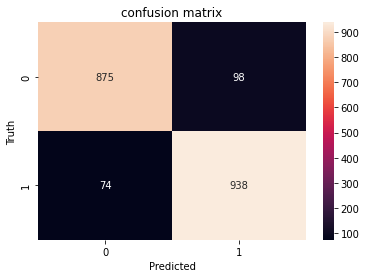

              precision    recall  f1-score   support

       False       0.92      0.90      0.91       973
        True       0.91      0.93      0.92      1012

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 4  !!!!!
     In training: Counter({False: 8952, True: 8915})
     In testing: Counter({True: 1011, False: 974})


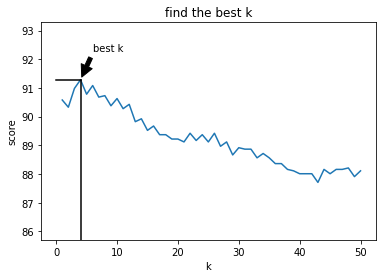

           The best k found: 4,  score = 0.9128463476070529


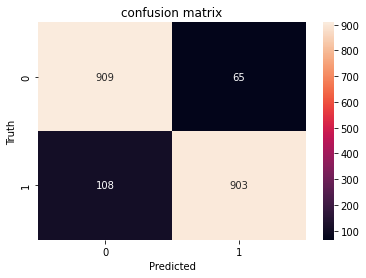

              precision    recall  f1-score   support

       False       0.89      0.93      0.91       974
        True       0.93      0.89      0.91      1011

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 5  !!!!!
     In training: Counter({True: 8938, False: 8929})
     In testing: Counter({False: 997, True: 988})


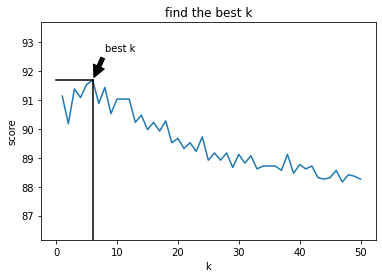

           The best k found: 6,  score = 0.9168765743073047


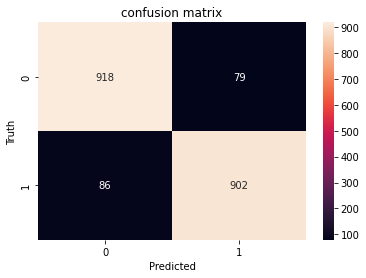

              precision    recall  f1-score   support

       False       0.91      0.92      0.92       997
        True       0.92      0.91      0.92       988

    accuracy                           0.92      1985
   macro avg       0.92      0.92      0.92      1985
weighted avg       0.92      0.92      0.92      1985

             !!!!!  split number : 6  !!!!!
     In training: Counter({False: 8947, True: 8920})
     In testing: Counter({True: 1006, False: 979})


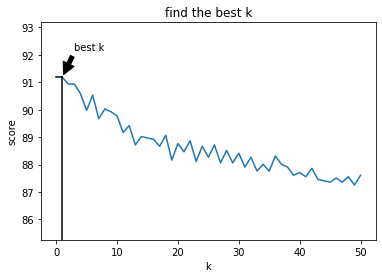

           The best k found: 1,  score = 0.9118387909319899


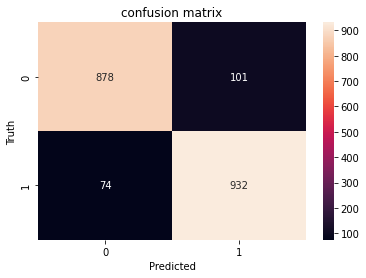

              precision    recall  f1-score   support

       False       0.92      0.90      0.91       979
        True       0.90      0.93      0.91      1006

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 7  !!!!!
     In training: Counter({True: 8979, False: 8888})
     In testing: Counter({False: 1038, True: 947})


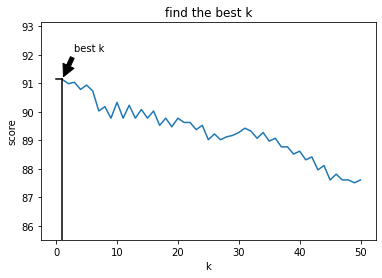

           The best k found: 1,  score = 0.9113350125944585


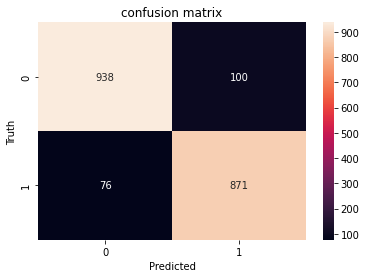

              precision    recall  f1-score   support

       False       0.93      0.90      0.91      1038
        True       0.90      0.92      0.91       947

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 8  !!!!!
     In training: Counter({True: 8964, False: 8903})
     In testing: Counter({False: 1023, True: 962})


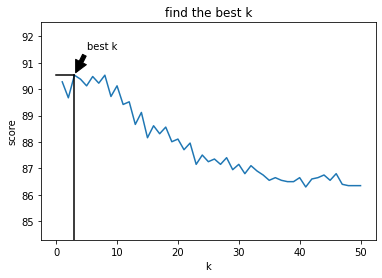

           The best k found: 3,  score = 0.9052896725440807


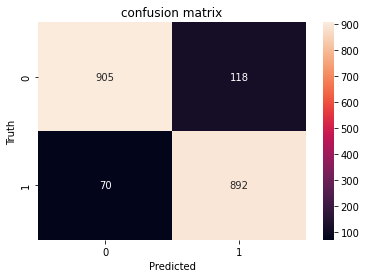

              precision    recall  f1-score   support

       False       0.93      0.88      0.91      1023
        True       0.88      0.93      0.90       962

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 9  !!!!!
     In training: Counter({True: 8952, False: 8915})
     In testing: Counter({False: 1011, True: 974})


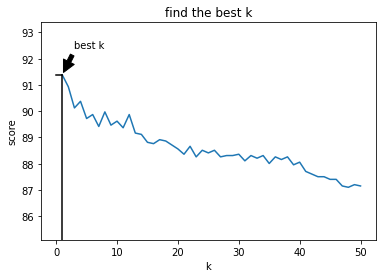

           The best k found: 1,  score = 0.9138539042821159


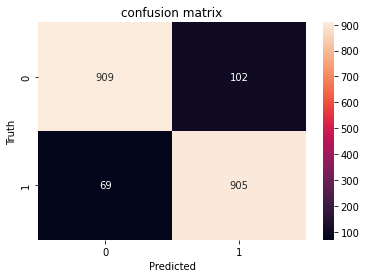

              precision    recall  f1-score   support

       False       0.93      0.90      0.91      1011
        True       0.90      0.93      0.91       974

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

             !!!!!  split number : 10  !!!!!
     In training: Counter({False: 8936, True: 8931})
     In testing: Counter({True: 995, False: 990})


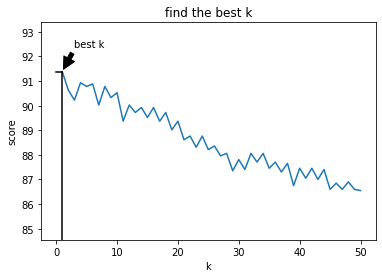

           The best k found: 1,  score = 0.9138539042821159


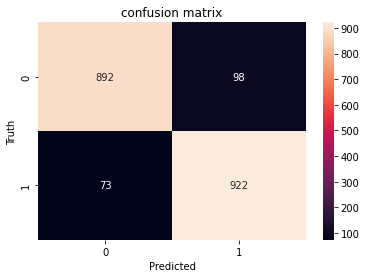

              precision    recall  f1-score   support

       False       0.92      0.90      0.91       990
        True       0.90      0.93      0.92       995

    accuracy                           0.91      1985
   macro avg       0.91      0.91      0.91      1985
weighted avg       0.91      0.91      0.91      1985

mean accuracy for this sub_experiment is 0.91
mean recall for this sub_experiment is 0.92
mean precision for this sub_experiment is 0.91
mean f1_score for this sub_experiment is 0.91
---------------------------------------------------------
                   End of Experiment
---------------------------------------------------------
mean accuracy for this experiment is 0.23
mean recall for this experiment is 0.23
mean precision for this experiment is 0.23
mean f1_score for this experiment is 0.23


In [40]:
sub_experiment_count = 1
accuracy  = 0
recall    = 0
f1_score  = 0
precision = 0
for dataSet in dataSet_array:
  dataSet_text = dataSet['text']
  dataSet_label = dataSet['label']
  sub_accuracy  = 0
  sub_recall    = 0
  sub_f1_score  = 0
  sub_precision = 0
  print('------------------------------------------------------------')
  #some output
  if sub_experiment_count == 1:
    print('!!!!!  sub-experiment with KNN model number 1  !!!!!')
    print('!!!!!  dataset used is : article and tweets with cleaning  !!!!!')
  elif sub_experiment_count == 2:
    print('!!!!!  sub-experiment with KNN model number 2  !!!!!')
    print('!!!!!  dataset used is : article and tweets without cleaning  !!!!!')
  elif sub_experiment_count == 3:
    print('!!!!!  sub-experiment with KNN model number 3  !!!!!')
    print('!!!!!  dataset used is : tweets with cleaning  !!!!!')
  elif sub_experiment_count == 4:
    print('!!!!!  sub-experiment with KNN model number 4  !!!!!')
    print('!!!!!  dataset used is : tweets without cleaning  !!!!!')
  print('------------------------------------------------------------')

  #cross validation counter
  split = 1
  kfold = KFold(n_splits=10, shuffle=True)
  
  #encode the texts
  sentences_encode = model.encode(dataSet_text)
  
  #cross validation loop
  for train, test in kfold.split(sentences_encode, dataSet_label):
  
    #convert the vectors to np array
    training_padded = np.array(sentences_encode[train])
    training_labels = np.array(dataSet_label[train])
    testing_padded  = np.array(sentences_encode[test])
    testing_labels  = np.array(dataSet_label[test])

    #some output
    print('             !!!!!  split number : '+ str(split) + '  !!!!!')
    print('     ' + f'In training: {Counter(training_labels)}')
    print('     ' + f'In testing: {Counter(testing_labels)}')

    #find best k
    k = find_the_best_k(training_padded, training_labels, testing_padded, testing_labels)
    #creat KNN model 
    knn = KNeighborsClassifier(n_neighbors=k)
    #fit the model
    knn.fit(training_padded, training_labels)
    #get the model score
    score = knn.score(testing_padded, testing_labels)
    #get the predicted lable
    lable_predicted = knn.predict(testing_padded)

    #some output
    print('           The best k found: '+str(k)+',  score = '+str(score))
    
    #create and show the confusion matrix
    cm = metrics.confusion_matrix(testing_labels, lable_predicted)
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('confusion matrix')
    plt.show()
    
    #show the classification report 
    print(metrics.classification_report(testing_labels, lable_predicted))

    #add the new metrics result from the new cross val. to the old  metrics result from the old cross val.
    sub_accuracy  = sub_accuracy + metrics.accuracy_score(testing_labels, lable_predicted)
    sub_recall    = sub_recall + metrics.recall_score(testing_labels, lable_predicted)
    sub_f1_score  = sub_f1_score + metrics.f1_score(testing_labels, lable_predicted)
    sub_precision = sub_precision + metrics.precision_score(testing_labels, lable_predicted)
    
    #indexing
    split = split + 1
  #compute the mean of the using metrics in the cross val.
  sub_accuracy  = sub_accuracy / 10
  sub_recall    = sub_recall / 10
  sub_f1_score  = sub_f1_score / 10
  sub_precision = sub_precision / 10

  #some output
  print("mean accuracy for this sub_experiment is " + str(round(sub_accuracy, 2)))
  print("mean recall for this sub_experiment is " + str(round(sub_recall, 2)))
  print("mean precision for this sub_experiment is " + str(round(sub_precision, 2)))
  print("mean f1_score for this sub_experiment is " + str(round(sub_f1_score, 2)))

  #add the new metrics result from the new sub experiment to the old  metrics result from the old sub experiments
  accuracy  = accuracy + sub_accuracy
  recall    = recall + sub_recall
  precision = precision + sub_precision
  f1_score  = f1_score + sub_f1_score

  #indexing
  sub_experiment_count = sub_experiment_count + 1

#compute the mean of the using metrics for the 4 sub experiments.
accuracy  = accuracy / 4
recall    = recall / 4
f1_score  = f1_score / 4
precision = precision / 4


#some output
print('---------------------------------------------------------')
print('                   End of Experiment')
print('---------------------------------------------------------')

print("mean accuracy for this experiment is " + str(round(accuracy, 2)))
print("mean recall for this experiment is " + str(round(recall, 2)))
print("mean precision for this experiment is " + str(round(precision, 2)))
print("mean f1_score for this experiment is " + str(round(f1_score, 2)))